<a href="https://colab.research.google.com/github/Isaias00C/MachineLearn/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# aprender Machine Learning
# iremos usar o dataset iris

# uso do KNN como classificador

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importar o dataset

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv(path, names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# processamento de dados para separar as informações para usar e os rotulos que iremos dar aos novos pontos

X = dataset.iloc[:, :-1].values # aqui ficam as informações para o KNN
y = dataset.iloc[:, 4].values # aqui é a coluna que diz os tipos das flores

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40) # separando os casos de teste e os casos de treino, nesse caso é na proporção 2:3

In [ ]:
# data scala agora

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# treinando agora o modelo

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

# agora classifier passa a ser meu modelo de ia

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# fazendo uma predição

y_pred = classifier.predict(X_test)

In [ ]:
# resultados

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

result = confusion_matrix(y_test, y_pred) # uma matrix para mostrar os casos acertados, no caso a diagonal principal sao os casos acertados
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

result3 = f1_score(y_test, y_pred, average=None)
print("F1-score:", result3)

Confusion Matrix:
[[21  0  0]
 [ 0 17  1]
 [ 0  1 20]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.95      0.95      0.95        21

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60

Accuracy: 0.9666666666666667
F1-score: [1.         0.94444444 0.95238095]


In [ ]:
# grid search

from sklearn.model_selection import GridSearchCV

# dataset

param = {
    'n_neighbors' : list(range(1,31))
}

for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

  grid_search = GridSearchCV(classifier, param, cv=5)

  grid_search.fit(X_train, y_train)

  print(grid_search.best_params_)

{'n_neighbors': 6}
{'n_neighbors': 11}
{'n_neighbors': 3}
{'n_neighbors': 5}
{'n_neighbors': 3}
{'n_neighbors': 5}
{'n_neighbors': 7}
{'n_neighbors': 1}
{'n_neighbors': 23}
{'n_neighbors': 4}
{'n_neighbors': 5}
{'n_neighbors': 4}
{'n_neighbors': 1}
{'n_neighbors': 9}
{'n_neighbors': 3}
{'n_neighbors': 3}
{'n_neighbors': 13}
{'n_neighbors': 1}
{'n_neighbors': 1}
{'n_neighbors': 7}
{'n_neighbors': 1}
{'n_neighbors': 7}
{'n_neighbors': 18}
{'n_neighbors': 1}
{'n_neighbors': 7}
{'n_neighbors': 4}
{'n_neighbors': 6}
{'n_neighbors': 1}
{'n_neighbors': 9}
{'n_neighbors': 4}


Confusion Matrix:
[[21  0  0]
 [ 0 17  1]
 [ 0  1 20]]


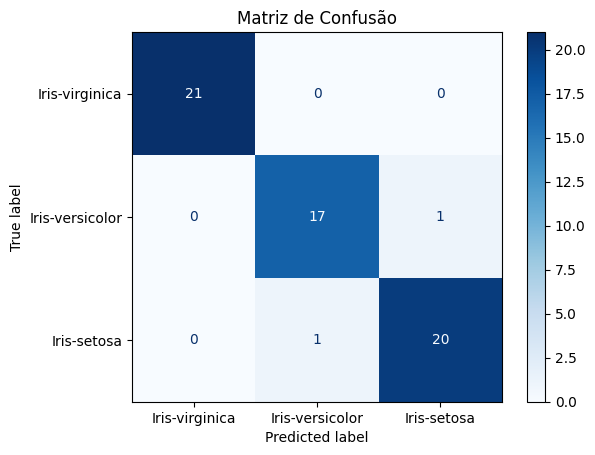

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.95      0.95      0.95        21

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60

Accuracy: 0.9666666666666667
F1-score: [1.         0.94444444 0.95238095]


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

result = confusion_matrix(y_test, y_pred) # uma matrix para mostrar os casos acertados, no caso a diagonal principal sao os casos acertados
print("Confusion Matrix:")
print(result)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=set(y))
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

result3 = f1_score(y_test, y_pred, average=None)
print("F1-score:", result3)

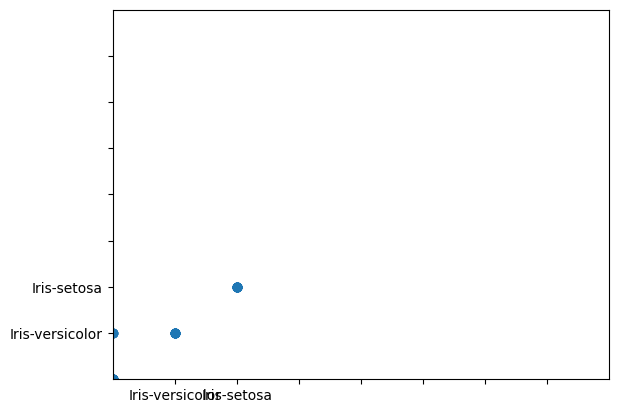

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versi

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-v

In [ ]:
# tentar mostrar em um gráfico

# scatter parametros:
# os dados a serem considerados serao os dados das orquideras

vx = [x lambda: for i in X: x = X[0]]
vy = [x, lambda ]
vz = [x, lambda]
